# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Feature engineering
4. Data Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv("../clean_data_after_eda.csv")
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.head(3)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   

   mean_3m_price_p1_var  mean_3m_price_p2_var  mean_3m_price_p3_var  \
0              0.131756              0.092638              0.036909   
1              0.147600              0.000000              0.000000   
2              0.167798              0.088409              0.000000   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   

   mean_3m_price_p1 mean_3m_price_p2  mean_3m_price_p3  churn  
0         42.629663        12.311304          8.182687      1  
1         44.592310         0.000000          0.000000      0  
2         44.612508         0.088409          0.000000      0  

[3 rows x 54 columns]

---

## 3. Feature engineering

### Discrepancy in off-peak prices between December and the previous January

Your colleague has provided the following code to compute the mentioned feature. Utilize this code to replicate the feature and subsequently explore avenues for enhancing this feature to generate predictive features.

In [7]:
price_df = pd.read_csv("C:/Users/HI/Desktop/BCG Task 1/Task 2/Task 2/price_data.csv")
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [8]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [9]:
df = pd.merge(df, diff, on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_p3_var  mean_3m_price_p1_fix  mean_3m_price_p2_fix  \
0              0.036909             42.497907             12.218665   
1              0.000000             44.444710              0.000000   
2              0.000000             44.444710              0.000000   
3              0.000000             44.444710              0.000000   
4              0.073719             40.728885             24.437330   

   mean_3m_price_p3_fix  mean_3m_price_p1  mean_3m_price_p2  mean_3m_price_p3  \
0              8.145777         42.629663         12.311304          8.182687   
1              0.000000         44.592310          0.000000          0.000000   
2              0.000000         44.612508          0.088409          0.000000   
3              0.000000         44.593296          0.000000          0.000000   
4             16.291555         40.848791         24.539003         16.365274   

  churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0     1                         0.020057                        3.700961  
1     0                        -0.003767                        0.177779  
2     0                        -0.004670                        0.177779  
3     0                        -0.004547                        0.177779  
4     0                        -0.006192                        0.162916  

[5 rows x 56 columns]

---

## Mean fluctuations in prices over time intervals

We can now improve upon the feature developed by our colleague by computing the average price changes across specific time periods, rather than considering the entire year.

In [10]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [11]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [12]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  mean_3m_price_p3  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...          8.182687   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...          0.000000   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...          0.000000   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...          0.000000   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...         16.365274   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0      1                         0.020057                        3.700961   
1      0                        -0.003767                        0.177779   
2      0                        -0.004670                        0.177779   
3      0                        -0.004547                        0.177779   
4      0                        -0.006192                        0.162916   

   off_peak_peak_var_mean_diff  peak_mid_peak_var_mean_diff  \
0                     0.024038                     0.034219   
1                     0.142485                     0.007124   
2                     0.082090                     0.088421   
3                     0.151210                     0.000000   
4                     0.020536                     0.030773   

   off_peak_mid_peak_var_mean_diff off_peak_peak_fix_mean_diff  \
0                         0.058257                   18.590255   
1                         0.149609                   44.311375   
2                         0.170512                   44.385450   
3                         0.151210                   44.400265   
4                         0.051309                   16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  
0                     7.450670                        26.040925  
1                     0.000000                        44.311375  
2                     0.000000                        44.385450  
3                     0.000000                        44.400265  
4                     8.137629                        24.412893  

[5 rows x 62 columns]

This feature could prove valuable as it introduces greater granularity to the previously identified feature by your colleague. Rather than assessing variances across an entire year, we have now generated features that examine the mean average price differences across distinct time intervals (`off-peak`, `peak`, `mid-peak`). The December-January feature may unveil macro patterns occurring throughout the year, while inter-time-period features may expose micro-scale patterns between months.

---

## Maximum Price Fluctuations Across Intervals and Months

Another approach to augmenting the feature introduced by our colleague is to investigate the maximum changes in prices across various periods and months.

In [13]:
# Aggregate average prices per period by company
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [14]:
# Calculate the mean difference between consecutive periods
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [15]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [16]:
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

df = pd.merge(df, max_diff_across_periods_months[columns], on='id')
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   off_peak_mid_peak_var_mean_diff  off_peak_peak_fix_mean_diff  \
0                         0.058257                    18.590255   
1                         0.149609                    44.311375   
2                         0.170512                    44.385450   
3                         0.151210                    44.400265   
4                         0.051309                    16.275263   

   peak_mid_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff  \
0                     7.450670                        26.040925   
1                     0.000000                        44.311375   
2                     0.000000                        44.385450   
3                     0.000000                        44.400265   
4                     8.137629                        24.412893   

   off_peak_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff  \
0                            0.060550                            0.085483   
1                            0.151367                            0.085483   
2                            0.084587                            0.089162   
3                            0.153133                            0.000000   
4                            0.022225                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                          44.266930   
1                                0.151367                          44.444710   
2                                0.172468                          44.444710   
3                                0.153133                          44.444710   
4                                0.055866                          16.291555   

   peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  
0                            8.145775                                44.26693  
1                            0.000000                                44.44471  
2                            0.000000                                44.44471  
3                            0.000000                                44.44471  
4                            8.145775                                24.43733  

[5 rows x 68 columns]

Considering the perspective of a PowerCo client, I believe calculating the maximum price change between months and time periods is a valuable feature to create. As a Utilities customer, experiencing sudden price changes between months can be quite annoying, and a significant increase in prices within a short timeframe could strongly influence a decision to explore other utility providers for better deals. Given our objective of predicting churn in this scenario, incorporating this feature seems particularly interesting and relevant.

---

## (BONUS) Additional Feature Enhancement

This section explores supplementary feature engineering ideas, as well as alternative methods to transform your data, considering certain statistical properties observed earlier, such as skewness.

### Tenure

The duration for which a company has been a client of PowerCo.

In [17]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [18]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

We observe that companies with a tenure of 4 months or less are significantly more likely to churn compared to those with a longer client history. Notably, the difference between 4 and 5 months is approximately 4%, representing a substantial increase in the likelihood of customer churn compared to other differences in ordered tenure values. This insight suggests that surpassing the 4-month tenure mark is a significant milestone in retaining customers for the long term.

This feature holds significance for modeling as it evidently demonstrates that the duration of being a client has an impact on the likelihood of churn.

### Transforming dates into months

- `months_activ`: Number of months active until the reference date (Jan 2016)
- `months_to_end`: Number of months left in the contract until the reference date (Jan 2016)
- `months_modif_prod`: Number of months since the last modification until the reference date (Jan 2016)
- `months_renewal`: Number of months since the last renewal until the reference date (Jan 2016)

In [19]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [20]:
# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

Transforming dates into usable features for predictive modeling:

- `months_activ`: Reflects client loyalty based on the duration of being an active PowerCo customer.
  
- `months_to_end`: Indicates potential churn patterns based on contract expiration proximity.
  
- `months_modif_prod`: Highlights client engagement through recent updates to their contract.
  
- `months_renewal`: Signifies client commitment and engagement level by tracking contract renewal intervals.

In [21]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  ...  peak_mid_peak_var_max_monthly_diff  \
0                     1.78  ...                            0.085483   
1                    16.27  ...                            0.085483   
2                    38.72  ...                            0.089162   
3                    19.83  ...                            0.000000   
4                   131.73  ...                            0.033743   

   off_peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff  \
0                                0.146033                           44.266930   
1                                0.151367                           44.444710   
2                                0.172468                           44.444710   
3                                0.153133                           44.444710   
4                                0.055866                           16.291555   

  peak_mid_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff  \
0                           8.145775                                44.26693   
1                           0.000000                                44.44471   
2                           0.000000                                44.44471   
3                           0.000000                                44.44471   
4                           8.145775                                24.43733   

   tenure  months_activ  months_to_end  months_modif_prod  months_renewal  
0       3            30              5                  2               6  
1       7            76              7                 76               4  
2       6            68              3                 68               8  
3       6            69              2                 69               9  
4       6            71              2                 71               9  

[5 rows x 69 columns]

### Converting Boolean data

#### has_gas

We aim to convert this column from a categorical representation to a binary flag.

In [22]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

The purchase of gas from PowerCo indicates customers with multiple products and loyalty to the brand. Consequently, it's unsurprising that customers not buying gas are almost 2% more likely to churn than those purchasing gas. This underscores the utility of this feature.

### Transforming categorical data

In preparation for a predictive model, categorical or string values must be encoded into numerical representations efficiently and discriminatively.

The straightforward method involves mapping each category to an integer (label encoding). However, this may not be suitable as it introduces an artificial order into a feature that may lack inherent order (e.g., `0 < 1 < 2 < 3...`).

An alternative approach is to employ `dummy variables`, also known as `one-hot encoding`. This creates a new feature for every unique value of a categorical column, assigning a 1 or 0 to indicate whether a company belongs to a specific category.

#### channel_sales

In [23]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will generate 8 dummy variables from this column. However, examining the output above, the last 3 categories reveal low occurrences (11, 3, and 2 respectively). Given our dataset's size of around 14,000 rows, these dummy variables will be predominantly 0, contributing little predictive power to the model. 

Consequently, we will omit these 3 dummy variables.

In [24]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946   
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  tenure  months_activ  months_to_end  \
0                        0.114481  ...       3            30              5   
1                        0.145711  ...       7            76              7   
2                        0.165794  ...       6            68              3   
3                        0.146694  ...       6            69              2   
4                        0.116900  ...       6            71              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  2               6                0   
1                 76               4                1   
2                 68               8                0   
3                 69               9                0   
4                 71               9                1   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

  channel_usilxuppasemubllopkaafesmlibmsdf  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 73 columns]

#### origin_up

In [25]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Similar to the `channel_sales` column, the last 3 categories in the output above demonstrate very low frequency. Consequently, we will exclude these from the features after generating dummy variables.

In [26]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57         0         54946   
1           1  d29c2c54acc38ff3c0614d0a653813dd      4660             0   
2           2  764c75f661154dac3a6c254cd082ea7d       544             0   
3           3  bba03439a292a1e166f80264c16191cb      1584             0   
4           4  149d57cf92fc41cf94415803a877cb4b      4425             0   

   cons_last_month  forecast_cons_12m  forecast_cons_year  \
0                0               0.00                   0   
1                0             189.95                   0   
2                0              47.96                   0   
3                0             240.04                   0   
4              526             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  months_modif_prod  months_renewal  \
0                        0.114481  ...                  2               6   
1                        0.145711  ...                 76               4   
2                        0.165794  ...                 68               8   
3                        0.146694  ...                 69               9   
4                        0.116900  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 75 columns]

### Transforming Numerical Data

In the preceding exercise, we observed that some variables exhibited significant skewness. Addressing skewness is essential because certain predictive models, known as parametric models, assume specific distributions for the input features. These models typically expect features to be both independent and normally distributed.

While skewness isn't always problematic, it is generally good practice to treat highly skewed variables. This not only aligns with model assumptions but can also enhance the convergence speed of predictive models.

There are various methods to address skewed variables, including applying transformations like the square root, cubic root, or logarithm to continuous numeric columns. In this case, we will employ the 'Logarithm' transformation for positively skewed features.

Note: Logarithm cannot be applied to a value of 0, so we will add a constant of 1 to all values.

Firstly, let's examine the statistics of the skewed features to compare them before and after transformation.

In [27]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

It is evident that the standard deviation for most of these features is quite high.

In [28]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [29]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now, we observe that for the majority of the features, their standard deviation is significantly lower after transformation. This is a positive outcome, indicating that these features are now more stable and predictable.

Let's quickly examine the distributions of some of these features as well.

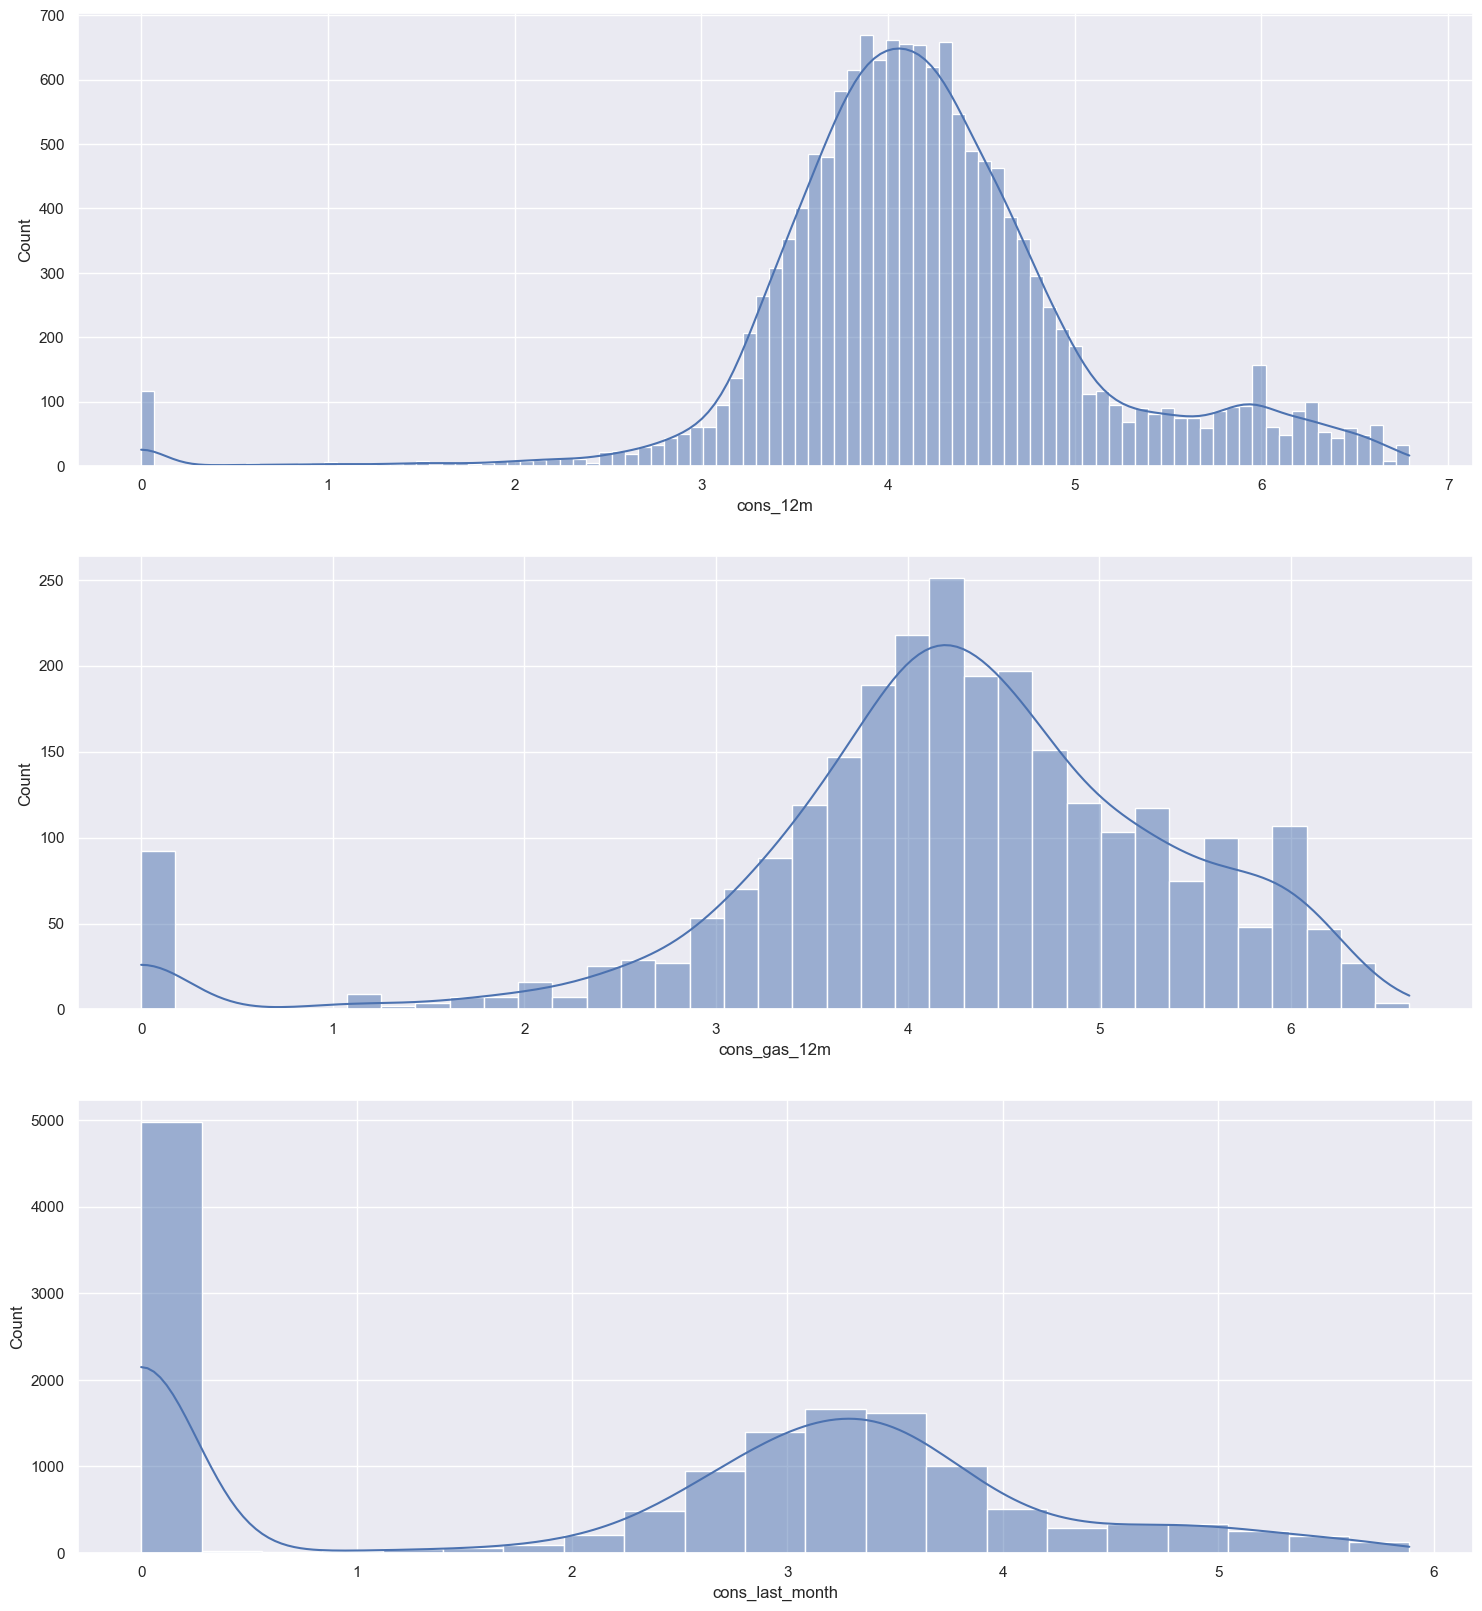

In [32]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))

# Plot histograms
sns.histplot(df["cons_12m"].dropna(), ax=axs[0], kde=True)
sns.histplot(df[df["has_gas"]==1]["cons_gas_12m"].dropna(), ax=axs[1], kde=True)
sns.histplot(df["cons_last_month"].dropna(), ax=axs[2], kde=True)

plt.show()


### Correlations

Feature engineering is an iterative process, and after training a model, we evaluate feature effectiveness. It's crucial to assess how features are correlated within the dataset. While we desire features correlated with churn, extremely high correlations between features can indicate information redundancy. Ideally, features should have low correlation with independent variables and high correlation with the target variable (churn). Let's explore the correlations between all features.

In [33]:
correlation = df.corr()

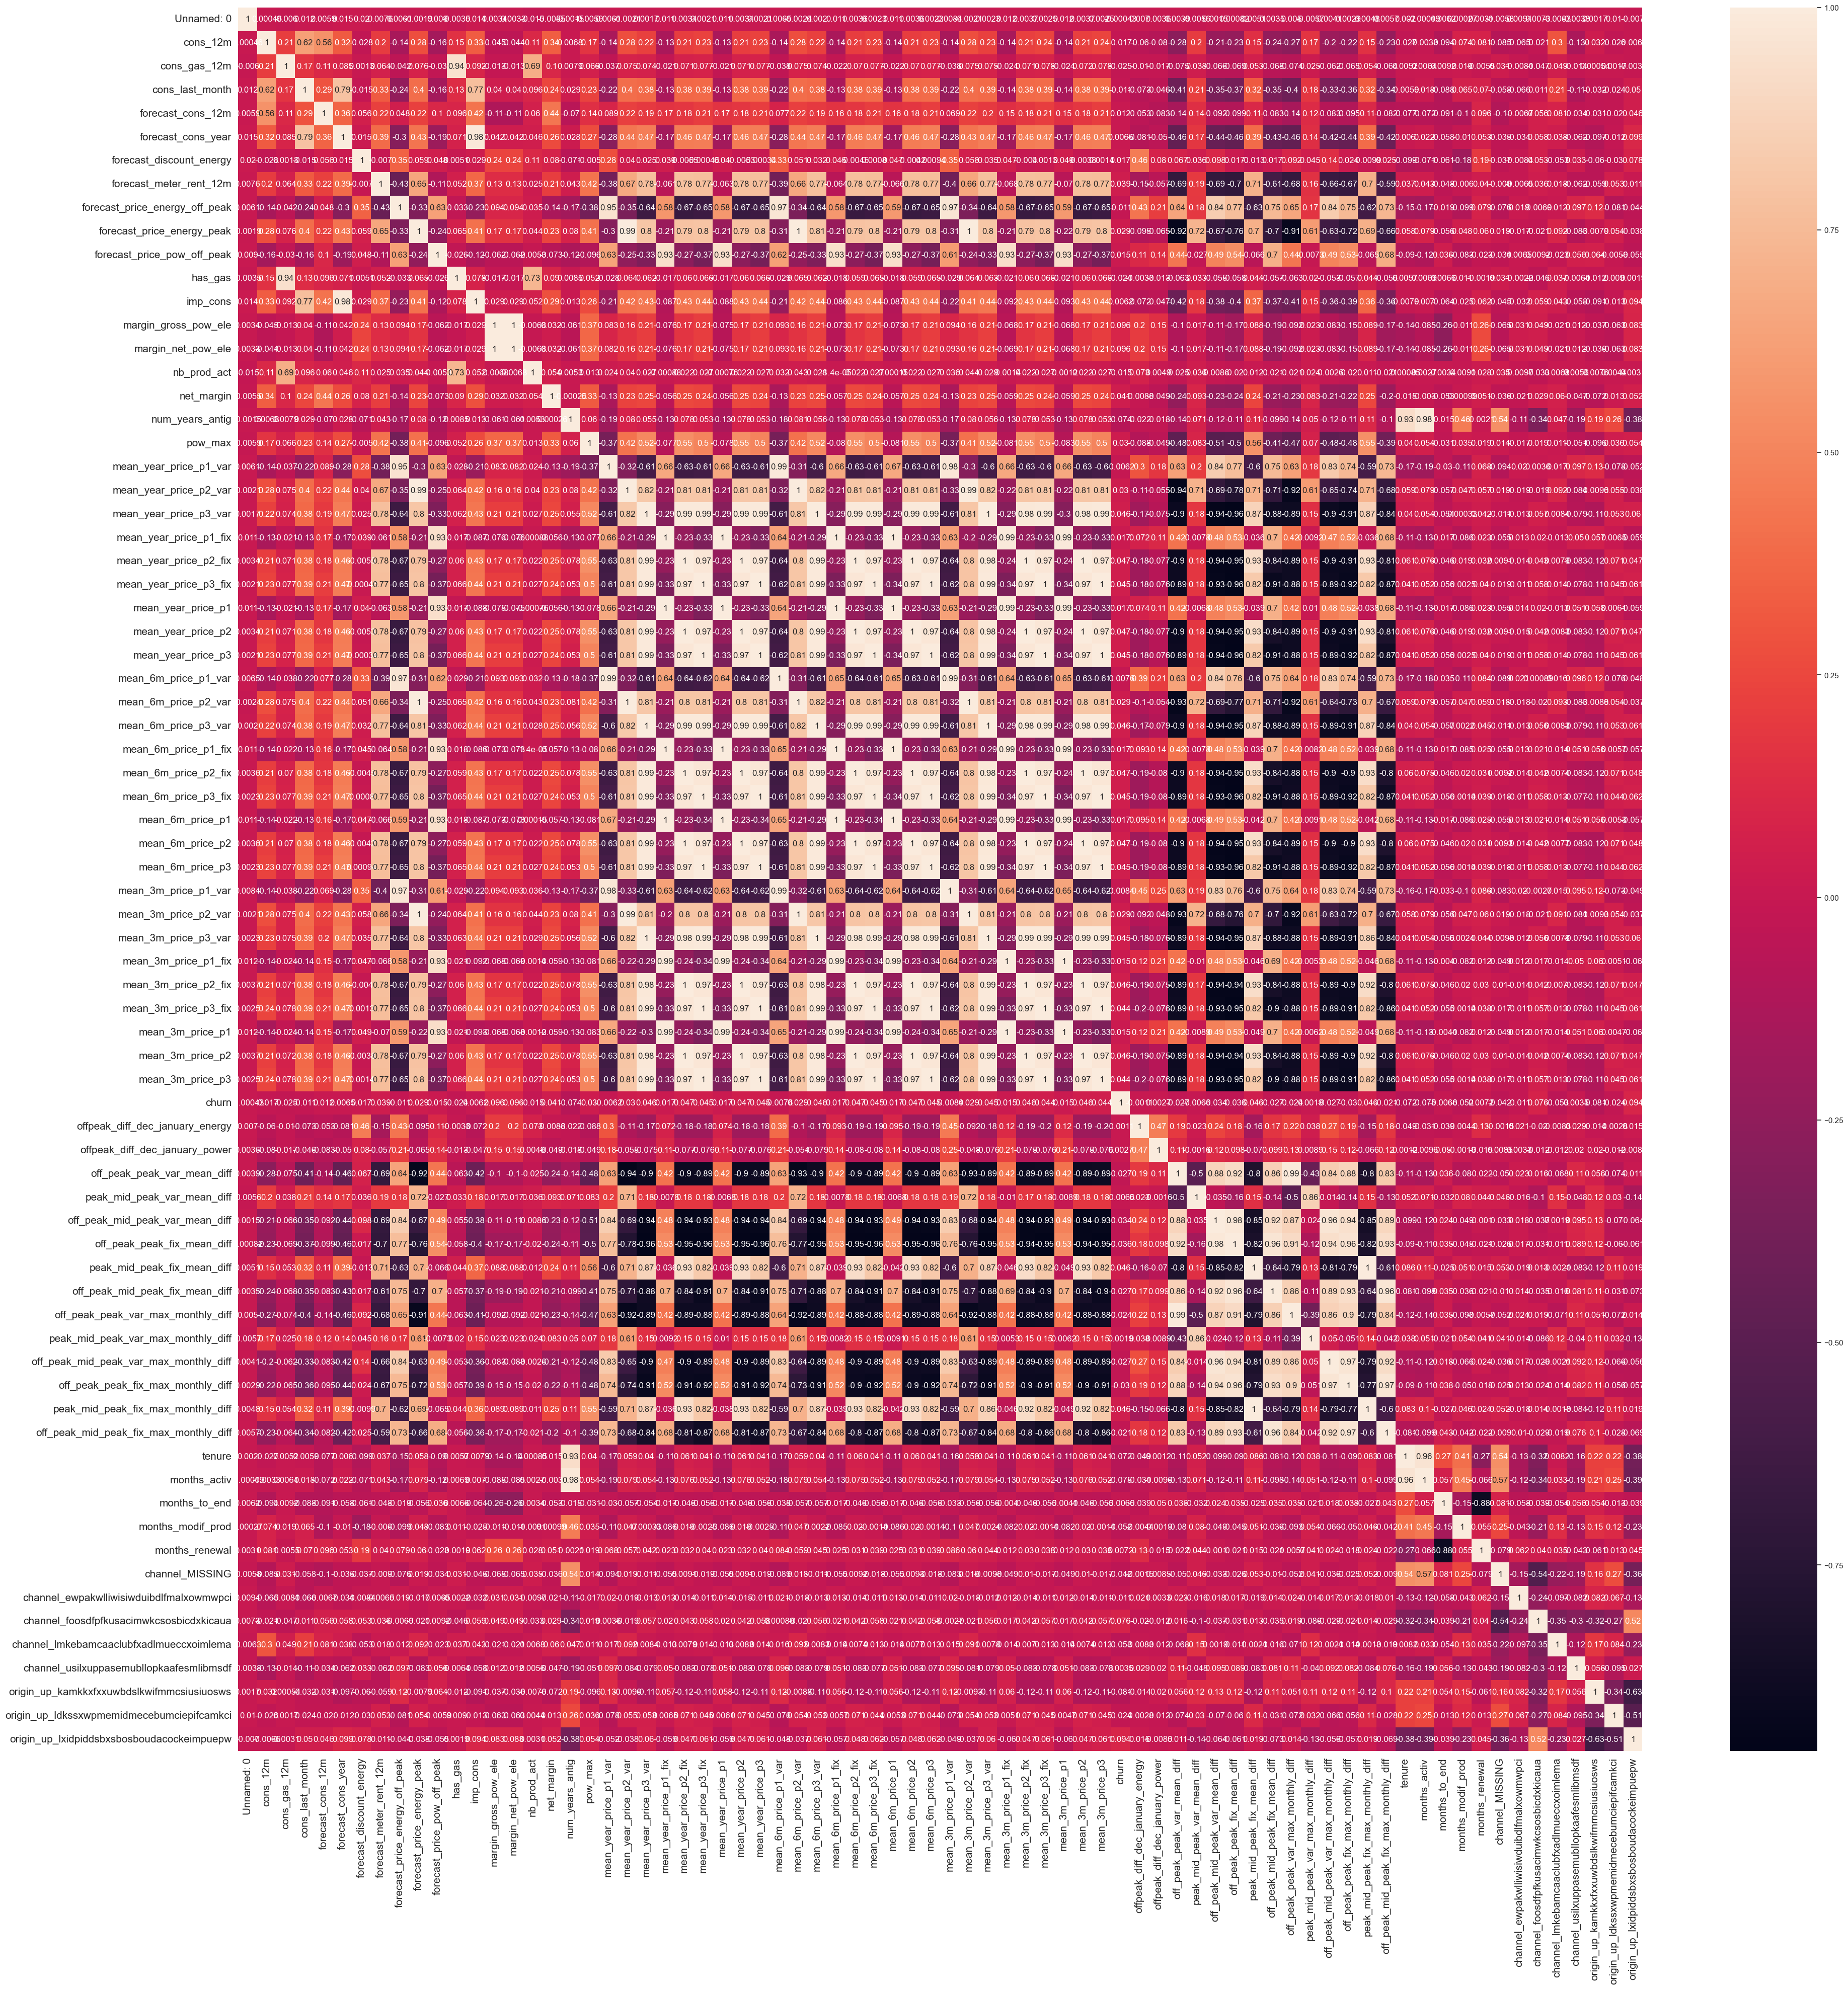

In [34]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

You have the discretion to choose which features to eliminate based on the correlation results, employing various methods for this decision. At this point, I'll eliminate two variables that demonstrate high correlation with other independent features.

In [35]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

Unnamed: 0                                id  cons_12m  cons_gas_12m  \
0           0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944   
1           1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000   
2           2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000   
3           3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000   
4           4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000   

   cons_last_month  forecast_cons_12m  forecast_discount_energy  \
0         0.000000           0.000000                       0.0   
1         0.000000           2.280920                       0.0   
2         0.000000           1.689841                       0.0   
3         0.000000           2.382089                       0.0   
4         2.721811           2.650065                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 0.444045                        0.114481   
1                 1.237292                        0.145711   
2                 1.599009                        0.165794   
3                 1.318689                        0.146694   
4                 2.122969                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  2               6   
1                    0.000000  ...                 76               4   
2                    0.087899  ...                 68               8   
3                    0.000000  ...                 69               9   
4                    0.100015  ...                 71               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                0                                         0   
1                1                                         0   
2                0                                         0   
3                0                                         0   
4                1                                         0   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                         1   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1                                           0  
2                                           0  
3                                           0  
4                                           0  

[5 rows x 73 columns]

---

## 5. Modelling

Our dataset is now equipped with engineered features, and we're prepared to initiate the training of a predictive model. It's essential to emphasize that our attention should be solely on training a `Random Forest` classifier.

In [36]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Data sampling

Our initial step involves dividing our dataset into training and test samples. This division is crucial as it allows us to simulate real-life scenarios by generating predictions for the test sample without revealing these data points to the predictive model. This evaluation helps assess how well our model generalizes to new data, a critical aspect of model performance.

A common practice is to allocate between 20-30% of the data for testing. In this example, we'll implement a 75-25% split, designating 75% for training and 25% for testing.

In [37]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14605, 71)
(14605,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 71)
(10953,)
(3652, 71)
(3652,)


### Model training

In this example, we're using a Random Forest classifier—an ensemble algorithm consisting of multiple Decision Trees. The Random Forest's strength lies in aggregating diverse decision trees, each trained on different data splits, enhancing predictive performance through collective knowledge. It utilizes a rule-based approach, eliminating the need for feature scaling, and excels in handling non-linear parameters. However, it demands high computational power for training large datasets, resulting in longer training times due to the complexity of the ensemble.

In [39]:
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

## Model Parameters

Refer to the scikit-learn documentation [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html] for detailed information about the Random Forest classifier and its parameters.

In this example, I've set `n_estimators` to 1000, meaning the random forest comprises 1000 decision trees. While there are several other parameters for fine-tuning within the random forest, exploring and finding the optimal combinations often involve a manual process of trial and error, which is beyond the scope of this notebook.

## Model Evaluation

We will assess the model's performance on the test dataset using three key metrics:

- **Accuracy:** The ratio of correctly predicted observations to the total observations.
- **Precision:** The ability of the classifier to avoid labeling a negative sample as positive.
- **Recall:** The ability of the classifier to identify all positive samples.

These metrics provide a more comprehensive understanding of the model's effectiveness, especially in scenarios where simple accuracy might be insufficient. For instance, in a medical context, misclassifying certain cases could have critical consequences, emphasizing the importance of precision and recall alongside accuracy.

In [40]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [41]:
y_test.value_counts()

0    3279
1     373
Name: churn, dtype: int64

In [42]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 17
False positives: 0
True negatives: 3279
False negatives: 356

Accuracy: 0.9025191675794085
Precision: 1.0
Recall: 0.045576407506702415


## Model Evaluation Results

After evaluating the model on the test set, several key observations are noteworthy:

1. **Dataset Composition:**
   - Approximately 10% of the test set rows correspond to churners (churn = 1).

2. **True Negatives:**
   - The model correctly predicted 3282 out of 3286 negative cases (churn = 0), indicating a high true negative rate.

3. **False Negatives:**
   - There are 348 instances where the model predicted a client would not churn (churn = 0), but they actually did churn (churn = 1). Reducing false negatives is crucial for model improvement.

4. **False Positives:**
   - The model made 4 false positive predictions, where it indicated a client would churn (churn = 1), but they did not. This is a positive outcome.

5. **True Positives:**
   - Out of the 366 clients who actually churned (churn = 1), the model correctly identified only 18. This represents a significant area for improvement.

6. **Accuracy:**
   - The accuracy score is relatively high, but it is deceptive. It does not provide a complete picture of the model's performance.

7. **Precision Score:**
   - The precision score is 0.82, indicating room for improvement but still a reasonable level.

8. **Recall Score:**
   - The recall score is low, highlighting the model's poor ability to identify positive samples (churners).

In summary, the model excels at identifying clients who do not churn but struggles to predict cases where clients do churn. The emphasis should be on enhancing feature engineering to create more discriminative features and experimenting with parameter optimization to boost model performance.

## Understanding Model Results: Feature Importances

To gain insights into the model's behavior, examining feature importances is a valuable approach. Feature importances reveal the significance of each feature in the predictive model. In the context of a Random Forest classifier, feature importances denote the number of times each feature is employed for splitting across all decision trees in the ensemble.

Understanding Feature Importances:

- **High Feature Importance:**
  - Features with higher importances were frequently utilized for splitting in decision trees, indicating their significance in predicting churn.

- **Low Feature Importance:**
  - Features with lower importances were less influential in the model's decision-making process.

By interpreting feature importances, data scientists can identify key factors contributing to the model's predictions. This knowledge can guide further investigations into specific features, potentially leading to refined feature engineering for improved model performance.

In [43]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


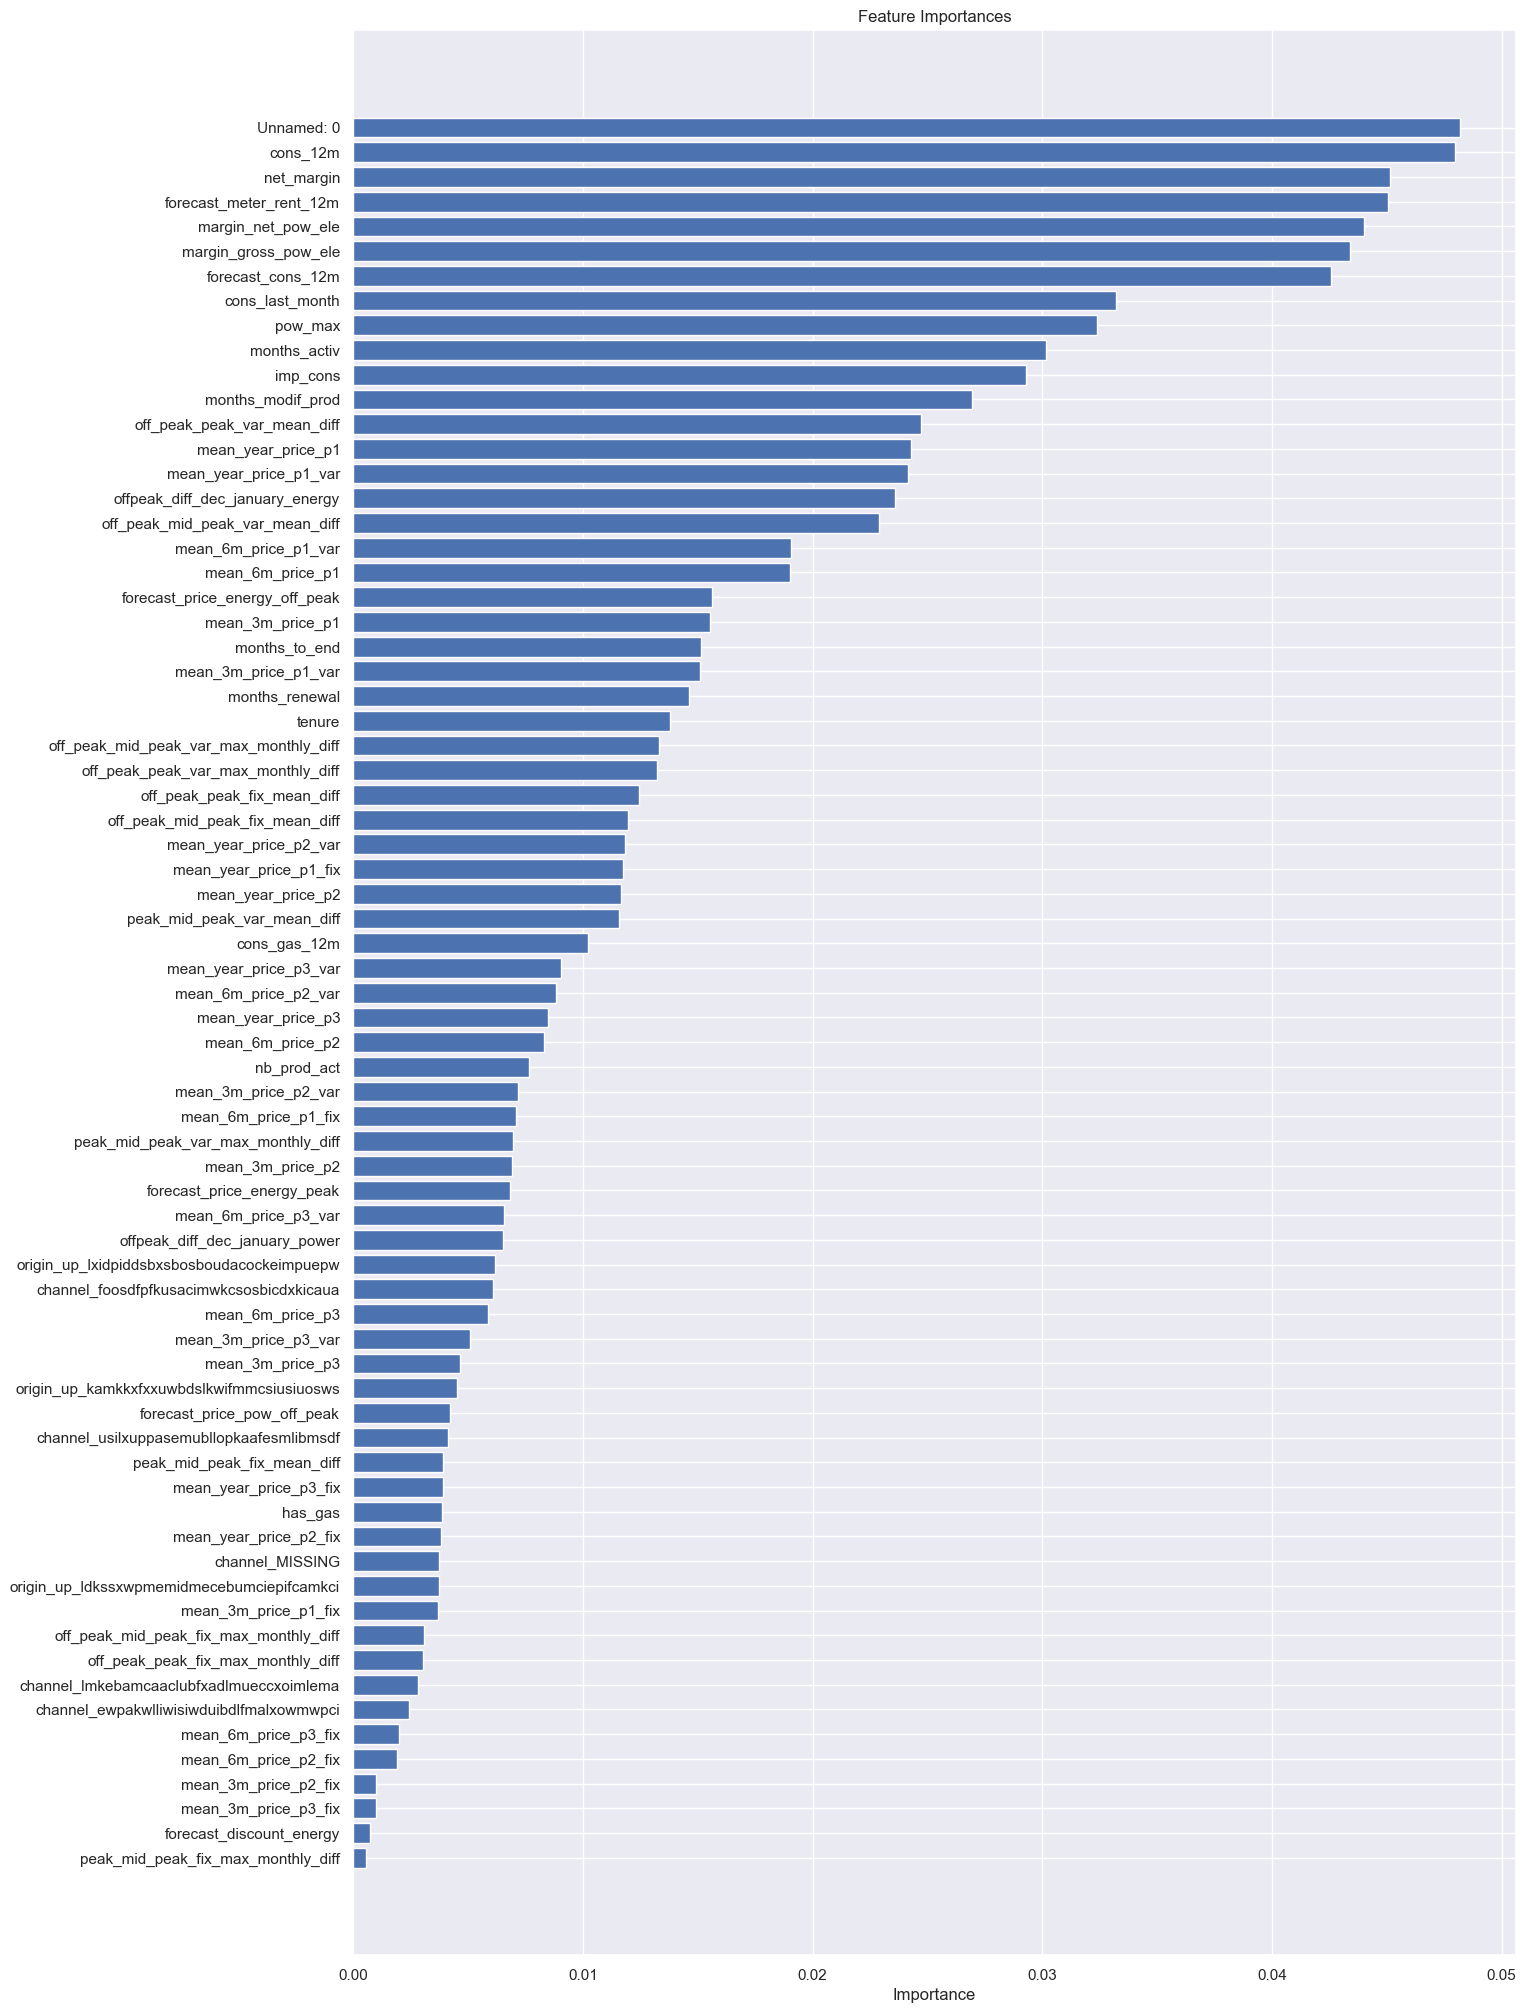

In [44]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

## Model Insight: Feature Importance Analysis

Analyzing the feature importances derived from the Random Forest classifier provides valuable insights into the factors influencing churn predictions. Here are key observations:

- **Net Margin and Consumption Over 12 Months:**
  - These features emerge as top drivers for churn, indicating that a client's financial health and consumption patterns significantly impact their likelihood of churning.

- **Margin on Power Subscription:**
  - This feature holds notable influence, suggesting that the profitability of power subscriptions plays a role in predicting churn.

- **Temporal Factors (Time):**
  - Features related to time, such as the number of months a client has been active, tenure, and the time since their last contract update, exhibit considerable importance. This highlights the temporal dimension in understanding churn dynamics.

- **Colleague-Recommended Feature:**
  - The recommended feature from a colleague holds a place in the top half of influential features. Interestingly, some derived features outperform the original recommendation.

- **Price Sensitivity Features:**
  - Features related to price sensitivity are scattered throughout the importance spectrum but do not emerge as the primary drivers for churn. They contribute weakly to the model's predictive power.

While price sensitivity features show some influence, the analysis suggests that they are not the main drivers of customer churn. This outcome prompts further exploration and experimentation to refine the understanding of the relationship between price sensitivity and churn.

In [45]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [46]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [47]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')